# Problem Definition:
> We're tasked to make prediction model for stock price.

# Data collection:
The dataset is taken from kaggle
Link: [https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021?resource=download]

# Approach:
1. Data import
2. EDA
3. Modeling
4. Prediction
5. Evaluation
6. Save the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
len(df)

10468

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


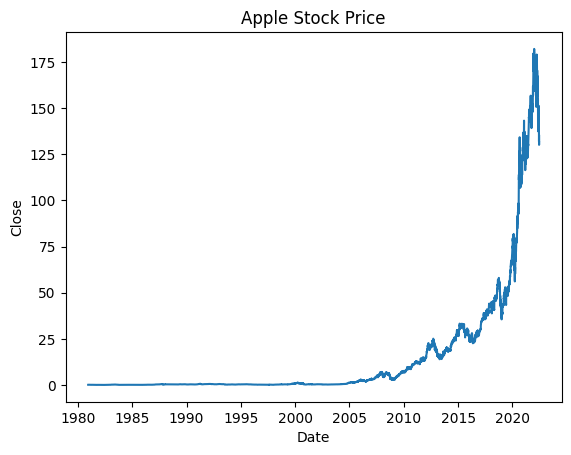

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Price')
plt.show()

the data before 2005 is unneccessary for our model

In [ ]:
df['Date'][10]

Timestamp('1980-12-29 00:00:00')

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,1980
...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,2022
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,2022
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,2022
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,2022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
 7   Year       10468 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 613.5 KB


In [ ]:
df_new = df[df['Year']>=2005]

In [ ]:
df_new

,Date,Open,High,Low,Close,Adj Close,Volume,Year
6072,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.966323,691992000,2005
6073,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.976247,1096810400,2005
6074,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.984798,680433600,2005
6075,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.985561,705555200,2005
6076,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.057321,2227450400,2005
...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,2022
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,2022
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,2022
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,2022


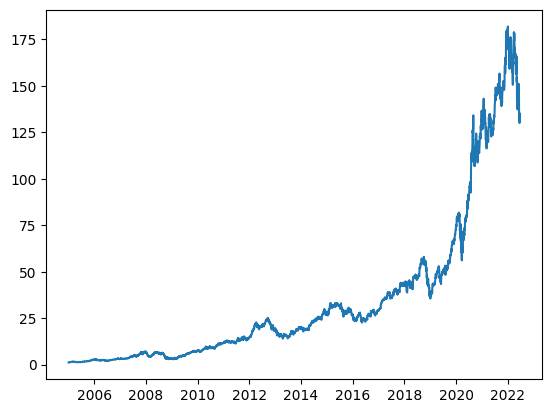

In [ ]:
plt.plot(df_new['Date'],df_new['Close']);

In [ ]:
df_new.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
count,4396,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4.396000e+03,4396.000000
mean,2013-09-25 07:13:42.202001664,34.695088,35.075389,34.314664,34.708242,33.276929,4.326476e+08,2013.239308
min,2005-01-03 00:00:00,1.139107,1.159107,1.117857,1.130179,0.966323,4.100000e+07,2005.000000
25%,2009-05-14 18:00:00,6.289732,6.403482,6.169554,6.266072,5.357603,1.281815e+08,2009.000000
50%,2013-09-25 12:00:00,20.438572,20.591429,20.249287,20.418214,17.687356,3.016926e+08,2013.000000
75%,2018-02-06 06:00:00,42.273749,42.672501,41.754376,42.262499,40.377352,6.110475e+08,2018.000000
max,2022-06-17 00:00:00,182.630005,182.940002,179.119995,182.009995,181.511703,3.372970e+09,2022.000000
std,NaN,41.715598,42.220107,41.219862,41.737230,41.851869,4.025782e+08,5.046006


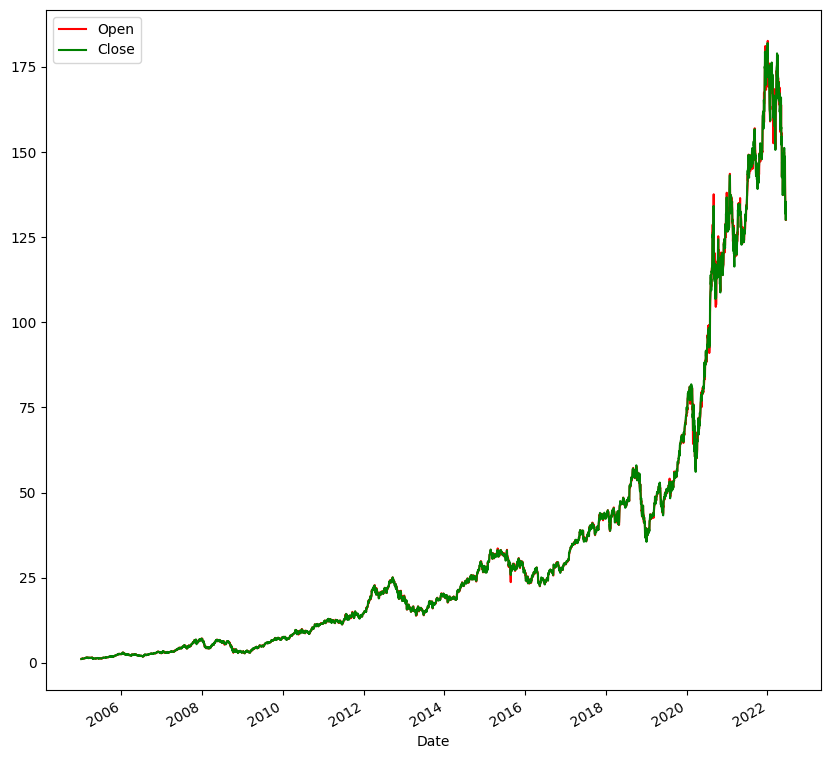

In [ ]:
df_new.plot(x='Date', y=['Open', 'Close'], color=['r', 'g'], figsize=(10, 10));

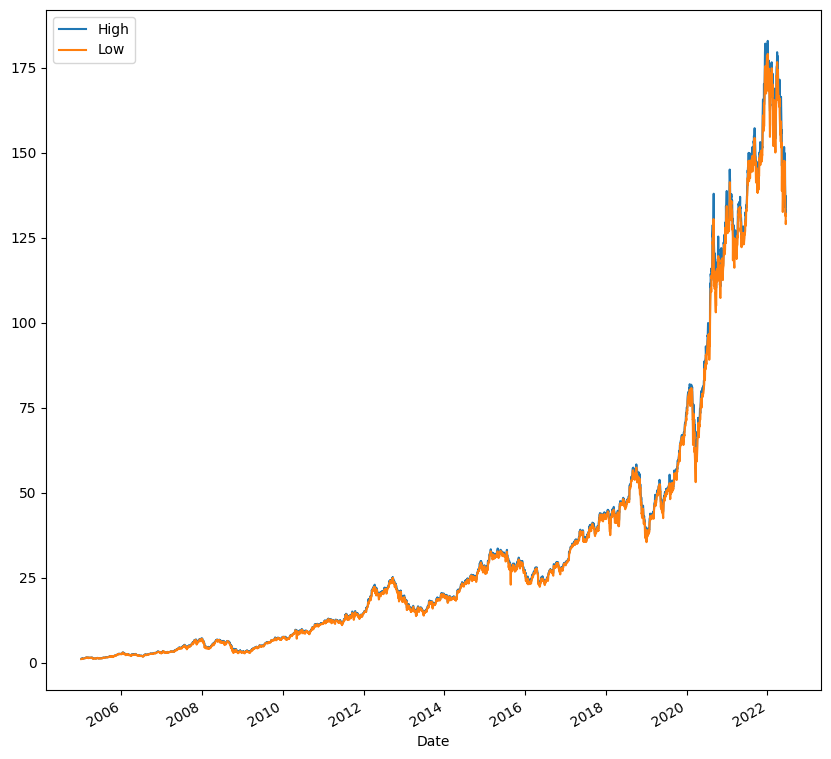

In [ ]:
df_new.plot('Date',['High','Low'],figsize=(10,10));

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_new.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
6072,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.966323,691992000,2005
6073,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.976247,1096810400,2005
6074,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.984798,680433600,2005
6075,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.985561,705555200,2005
6076,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.057321,2227450400,2005


In [61]:
df_new['Month'] = pd.DatetimeIndex(df_new['Date']).month
df_new['day'] = pd.DatetimeIndex(df_new['Date']).day
df_new.drop(columns=['Date'], inplace=True)

<ipython-input-61-5337c8a05e37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month'] = pd.DatetimeIndex(df_new['Date']).month
<ipython-input-61-5337c8a05e37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['day'] = pd.DatetimeIndex(df_new['Date']).day
<ipython-input-61-5337c8a05e37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [62]:
df_new.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day
6072,1.156786,1.162679,1.117857,1.130179,0.966323,691992000,2005,1,3
6073,1.139107,1.169107,1.124464,1.141786,0.976247,1096810400,2005,1,4
6074,1.151071,1.165179,1.143750,1.151786,0.984798,680433600,2005,1,5
6075,1.154821,1.159107,1.130893,1.152679,0.985561,705555200,2005,1,6
6076,1.160714,1.243393,1.156250,1.236607,1.057321,2227450400,2005,1,7


Splitting

In [64]:
X=df_new.drop(['Close'], axis=1)
X

,Open,High,Low,Adj Close,Volume,Year,Month,day
6072,1.156786,1.162679,1.117857,0.966323,691992000,2005,1,3
6073,1.139107,1.169107,1.124464,0.976247,1096810400,2005,1,4
6074,1.151071,1.165179,1.143750,0.984798,680433600,2005,1,5
6075,1.154821,1.159107,1.130893,0.985561,705555200,2005,1,6
6076,1.160714,1.243393,1.156250,1.057321,2227450400,2005,1,7
...,...,...,...,...,...,...,...,...
10463,132.869995,135.199997,131.440002,131.880005,122207100,2022,6,13
10464,133.130005,133.889999,131.479996,132.759995,84784300,2022,6,14
10465,134.289993,137.339996,132.160004,135.429993,91533000,2022,6,15
10466,132.080002,132.389999,129.039993,130.059998,108123900,2022,6,16


In [65]:
y= df_new['Close']
y

,Close
6072,1.130179
6073,1.141786
6074,1.151786
6075,1.152679
6076,1.236607
...,...
10463,131.880005
10464,132.759995
10465,135.429993
10466,130.059998


In [66]:
X_train, X_test, y_train,y_test= train_test_split(X,y,random_state=100,test_size=0.2)

In [77]:
y_train.shape

(3516,)

In [74]:
X_train.shape, y_train.shape

((3516, 8), (3516,))

In [81]:
import numpy as np
scalar= MinMaxScaler()
X_train_scaled= scalar.fit_transform(X_train)
y_train_scaled = scalar.fit_transform(y_train.values.reshape(-1, 1))



In [84]:
X_train_scaled

array([[7.07994954e-02, 7.10126881e-02, 7.18246404e-02, ...,
        3.52941176e-01, 1.00000000e+00, 3.66666667e-01],
       [7.33981155e-01, 7.39191498e-01, 7.44768912e-01, ...,
        9.41176471e-01, 9.09090909e-02, 3.66666667e-01],
       [8.50200212e-03, 8.52969725e-03, 8.59070445e-03, ...,
        5.88235294e-02, 8.18181818e-01, 3.33333333e-02],
       ...,
       [6.11896251e-03, 6.12884539e-03, 6.03446049e-03, ...,
        5.88235294e-02, 3.63636364e-01, 7.66666667e-01],
       [7.86149617e-04, 7.67209337e-04, 8.07604546e-04, ...,
        0.00000000e+00, 2.72727273e-01, 8.66666667e-01],
       [6.14140391e-01, 6.19514471e-01, 6.11675672e-01, ...,
        8.82352941e-01, 6.36363636e-01, 3.00000000e-01]])

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [88]:
model = RandomForestRegressor()
model.fit(X_train_scaled,y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [89]:
y_preds = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [91]:
y_preds[10]

0.9949460826709717

In [93]:
y_test[:10]

,Close
6374,2.296786
9201,38.747501
8272,17.026787
10331,163.759995
7698,11.437857
10286,142.830002
6781,6.596429
9129,34.165001
9116,32.572498
6280,1.945357


In [94]:
model_2= LinearRegression()
model_2.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [107]:
y_preds_2= model_2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [100]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_preds_2,y_test)

ValueError: continuous is not supported

In [101]:
y_test

,Close
6374,2.296786
9201,38.747501
8272,17.026787
10331,163.759995
7698,11.437857
...,...
9612,39.075001
9404,41.945000
7355,6.932857
10255,151.119995


In [112]:
y_true = y_test.to_numpy()

In [114]:
y_true

array([  2.296786,  38.747501,  17.026787, 163.759995,  11.437857,
       142.830002,   6.596429,  34.165001,  32.572498,   1.945357,
        31.9025  ,  23.825001,   1.218929,  54.470001,  38.252499,
         1.42    ,   4.196429,   3.344643,  18.694286,  29.0275  ,
        44.047501,  27.34    ,   2.552143,   8.155714,   2.400357,
         2.403571,  57.310001,  42.275002,  13.446786,  81.217499,
         6.086429,  47.860001,   3.816071,  27.497499, 130.149994,
         7.479643,   6.227143,  14.719286, 150.619995,   7.166429,
         3.046429,   6.748214,  11.655357,  38.787498,   3.833571,
       145.860001,  25.395   ,   9.315357,  68.3125  ,  46.974998,
        25.2575  ,  43.107498,  23.758572,   6.646429,  60.814999,
        11.3625  ,   6.201429,  21.905714,   2.091429,   4.705714,
         8.940357,  23.35    ,   6.851071,   9.238214,   2.871786,
        21.780714,   7.136786,  42.0975  ,  18.845715,  47.7575  ,
         3.059286,  44.724998,  25.254999,  64.309998,  56.602

In [105]:
y_true[10]

31.9025

In [108]:
y_preds_2[10]

array([-169125.98944734])